In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import seaborn as sns

In [4]:
dcs = pd.read_csv('/Users/jaclynfink/Downloads/Indiana DCS.csv')

In [5]:
#All columns in dataset
dcs.columns

Index(['REF_ID', 'REPORT_DATE_RAW', 'DATETIME', 'COUNTY', 'DECISION',
       'RESPONSE_TIME', 'ASM_MALTREATMENT', 'ASSESSMENT_DECISION',
       'SUBSTANTIATED', 'PARTICIPANT', 'AGE'],
      dtype='object')

In [6]:
dcs.shape

(402070, 11)

In [7]:
#Drop rows where there are duplicates across all columns. Keep the first instance
dcs = dcs.drop_duplicates()
dcs.shape

(401981, 11)

In [8]:
#Return number of null values in each column
dcs.isnull().sum(axis = 0)

REF_ID                     0
REPORT_DATE_RAW            0
DATETIME                   0
COUNTY                     0
DECISION                   0
RESPONSE_TIME              0
ASM_MALTREATMENT       19229
ASSESSMENT_DECISION        0
SUBSTANTIATED              0
PARTICIPANT                0
AGE                        0
dtype: int64

In [9]:
#Filter out adults from dataset
dcs = dcs[dcs['AGE'] < 21]

# Exploring unique values in columns

In [10]:
dcs['RESPONSE_TIME'].value_counts()

24 hours    233088
5 days      124893
2 hours      30476
1 hour       13477
Name: RESPONSE_TIME, dtype: int64

In [11]:
# Value counts for each type of maltreatment
dcs['ASM_MALTREATMENT'].value_counts()

neglect                                                         254955
neglect,physical abuse                                           60349
physical abuse                                                   20913
sexual abuse                                                     18679
neglect,sexual abuse                                             17087
neglect,physical abuse,sexual abuse                               7948
physical abuse,sexual abuse                                       1700
human/sexual trafficking,neglect,sexual abuse                      456
human/sexual trafficking,sexual abuse                              246
human/sexual trafficking,neglect,physical abuse,sexual abuse       241
human/sexual trafficking,neglect                                    81
human/sexual trafficking                                            34
human/sexual trafficking,physical abuse,sexual abuse                25
human/sexual trafficking,neglect,physical abuse                     18
human/

In [12]:
dcs['REF_ID'].value_counts()

1177646816    32
119600451     31
1322048963    30
859782401     30
1617524825    29
              ..
378247143      1
1975146463     1
1602387930     1
112334807      1
1050148864     1
Name: REF_ID, Length: 215633, dtype: int64

In [13]:
dcs['DECISION'].value_counts()

Screen In    401934
Name: DECISION, dtype: int64

In [14]:
dcs['ASSESSMENT_DECISION'].value_counts()

accepted                 384055
withdrawn                 12699
active                     3699
supervisor_review          1354
central_office_review       119
reopened                      8
Name: ASSESSMENT_DECISION, dtype: int64

In [15]:
dcs['PARTICIPANT'].value_counts()

Victim    401934
Name: PARTICIPANT, dtype: int64

# Raw data Visualizations

<AxesSubplot:>

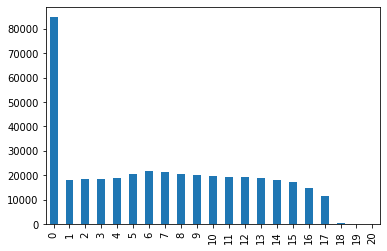

In [16]:
#Count of cases per age
dcs['AGE'].value_counts().sort_index().plot(kind='bar')

# Exploded df analysis - splitting ASM_MALTREATMENT column

In [127]:
# ** ADD VISUALIZATION FOR NUMBER OF UNIQUE MALTREATMENTS

In [17]:
# split the strings into multiple rows
exploded_df = dcs.assign(ASM_MALTREATMENT=dcs.ASM_MALTREATMENT.str.split(",")).explode('ASM_MALTREATMENT')
exploded_df.shape

(499019, 11)

<AxesSubplot:>

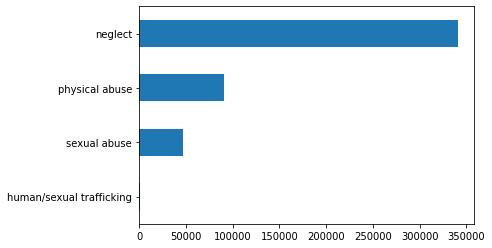

In [18]:
#Count of cases per maltreatment type (child REF_ID can be represented multiple times)
exploded_df['ASM_MALTREATMENT'].value_counts(ascending=True).plot(kind='barh')

In [19]:
exploded_df['ASM_MALTREATMENT'].value_counts(ascending=True)

human/sexual trafficking      1106
sexual abuse                 46382
physical abuse               91199
neglect                     341135
Name: ASM_MALTREATMENT, dtype: int64

<AxesSubplot:xlabel='SUBSTANTIATED'>

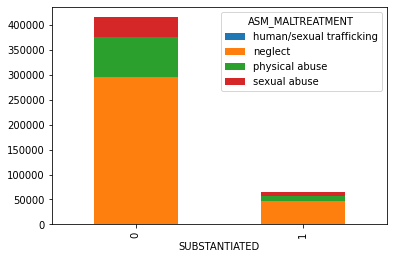

In [20]:
# Counts of substantiation based on type of maltreatment (child REF_ID can be represented multiple times)
exploded_df.groupby(['SUBSTANTIATED','ASM_MALTREATMENT']).size().unstack().plot(kind = 'bar', stacked=True)

<AxesSubplot:ylabel='ASM_MALTREATMENT'>

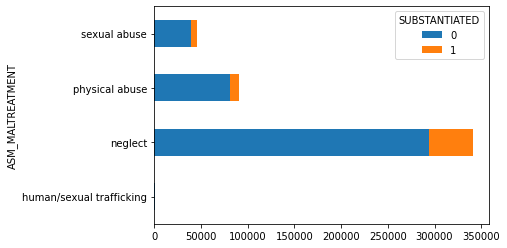

In [21]:
# Counts of substantiation based on type of maltreatment (child REF_ID can be represented multiple times)
exploded_df.groupby(['ASM_MALTREATMENT','SUBSTANTIATED']).size().unstack().plot(kind = 'barh', stacked=True)

In [22]:
exploded_df.groupby(['ASM_MALTREATMENT','SUBSTANTIATED']).size().unstack()

SUBSTANTIATED,0,1
ASM_MALTREATMENT,,
human/sexual trafficking,940,166
neglect,293713,47422
physical abuse,81149,10050
sexual abuse,39359,7023


In [23]:
print(round((165/932)*100, 2), "% of human/sexual trafficking cases are substantiated")
print(round((47400/293441)*100,2), "% of neglect cases are substantiated")
print(round((10039/81063)*100,2), "% of physical abuse cases are substantiated")
print(round((7020/39282)*100,2), "% of sexual abuse cases are substantiated")

17.7 % of human/sexual trafficking cases are substantiated
16.15 % of neglect cases are substantiated
12.38 % of physical abuse cases are substantiated
17.87 % of sexual abuse cases are substantiated


In [24]:
exploded_df.groupby(['AGE','ASM_MALTREATMENT','SUBSTANTIATED']).size().unstack()

SUBSTANTIATED                       0        1
AGE ASM_MALTREATMENT                          
0   human/sexual trafficking    108.0     24.0
    neglect                   59450.0  13801.0
    physical abuse             8578.0   1561.0
    sexual abuse               2498.0    403.0
1   human/sexual trafficking      5.0      3.0
...                               ...      ...
18  physical abuse               86.0     11.0
    sexual abuse                 76.0      3.0
19  neglect                       2.0      NaN
20  neglect                       1.0      NaN
    sexual abuse                  1.0      NaN

[79 rows x 2 columns]

In [25]:
#Create age bins
#exploded_df['age_bins'] = pd.cut(x=exploded_df['AGE'], bins=[0, 4, 8, 12, 16, 20], include_lowest =True)
#exploded_df.groupby(['age_bins','SUBSTANTIATED']).size().unstack().plot.bar(stacked=True)

In [26]:
#exploded_df.groupby(['age_bins','SUBSTANTIATED']).size().unstack()

In [27]:
print(round((30516/154944)*100, 2), "% of 0-3 y/o child cases are substantiated")
print(round((12640/93369)*100,2), "% of 4-7 y/o child cases are substantiated")
print(round((11157/87436)*100,2), "% of 8-11 y/o child cases are substantiated")
print(round((10844/82687)*100,2), "% of 12-15 cases are substantiated")
print(round((1538/13888)*100,2), "% of 16-20 cases are substantiated")

19.69 % of 0-3 y/o child cases are substantiated
13.54 % of 4-7 y/o child cases are substantiated
12.76 % of 8-11 y/o child cases are substantiated
13.11 % of 12-15 cases are substantiated
11.07 % of 16-20 cases are substantiated


# K-means Clustering

In [28]:
# SCALE variables -- https://s3.amazonaws.com/assets.datacamp.com/production/course_10628/slides/chapter3.pdf 
# Normalize age column
# https://www.youtube.com/watch?v=EItlUEPCIzM

#Add column NUM_CASES for number of times a particular REF_ID is reported
dcs['NUM_CASES'] = dcs.groupby('REF_ID')['REF_ID'].transform('count')


dcs.shape

(401934, 12)

In [29]:
#De-dupe REF_ID
dedupe_dcs = dcs.drop_duplicates(subset='REF_ID', keep='first')
dedupe_dcs.shape

(215633, 12)

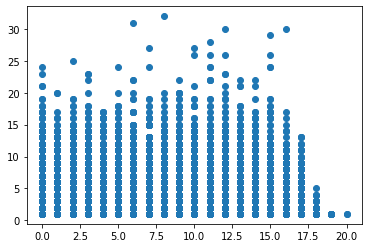

In [30]:
plt.scatter(dedupe_dcs['AGE'], dedupe_dcs['NUM_CASES'])

In [109]:
c = dedupe_dcs[['AGE', 'NUM_CASES']]
kmeans = KMeans(n_clusters=2, n_init=20)

In [110]:
y_predicted = kmeans.fit_predict(dedupe_dcs[['NUM_CASES', 'AGE']])
y_predicted

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [111]:
dedupe_dcs['cluster'] = y_predicted
dedupe_dcs.head()

/Users/jaclynfink/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,REF_ID,REPORT_DATE_RAW,DATETIME,COUNTY,DECISION,RESPONSE_TIME,ASM_MALTREATMENT,ASSESSMENT_DECISION,SUBSTANTIATED,PARTICIPANT,AGE,NUM_CASES,cluster
0,1406424407,1/1/19 0:32,0019-01-01 00:32:00.000,Kosciusko,Screen In,5 days,neglect,withdrawn,0,Victim,11,3,1
1,490485216,1/1/19 7:16,0019-01-01 07:16:00.000,Lake,Screen In,24 hours,"neglect,physical abuse",accepted,1,Victim,0,1,0
2,1773822066,1/1/19 11:34,0019-01-01 11:34:00.000,Marion,Screen In,24 hours,neglect,accepted,0,Victim,9,1,1
3,9124632,1/1/19 13:22,0019-01-01 13:22:00.000,Lake,Screen In,24 hours,neglect,accepted,0,Victim,5,3,0
4,2067805478,1/1/19 18:41,0019-01-01 18:41:00.000,Ripley,Screen In,24 hours,"neglect,physical abuse",accepted,0,Victim,4,2,0


In [125]:
print(dedupe_dcs[dedupe_dcs.cluster == 0].shape)
print(dedupe_dcs[dedupe_dcs.cluster == 1].shape)

(114152, 13)
(101481, 13)


No handles with labels found to put in legend.


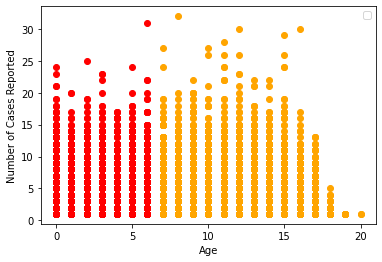

In [112]:
dedupe_dcs1 = dedupe_dcs[dedupe_dcs.cluster == 0]
dedupe_dcs2 = dedupe_dcs[dedupe_dcs.cluster == 1]


plt.scatter(dedupe_dcs1.AGE, dedupe_dcs1['NUM_CASES'], color='red')
plt.scatter(dedupe_dcs2.AGE, dedupe_dcs2['NUM_CASES'], color='orange')



plt.xlabel("Age")
plt.ylabel("Number of Cases Reported")
plt.locator_params(axis="both", integer=True)
plt.legend()

In [34]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(dedupe_dcs[['AGE', 'NUM_CASES']])
    sse.append(km.inertia_)

In [35]:
# sse = sum of squared error
sse

[7420986.546487342,
 2099606.9732800587,
 1180645.5170085046,
 894339.6863968559,
 706184.288908832,
 586747.0585685117,
 482433.43229463696,
 425716.6762506262,
 372984.0454387169]

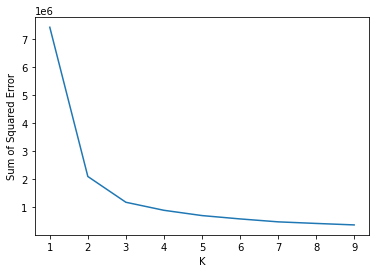

In [36]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_range, sse)

In [62]:
#Add column NUM_MALTREATMENTS for number of times a particular REF_ID is reported
exploded_df['NUM_MALTREATMENTS'] = exploded_df.groupby('REF_ID')['ASM_MALTREATMENT'].transform('nunique')

exploded_df.shape

(499019, 13)

In [63]:
#Add column NUM_CASES for number of times a particular REF_ID is reported
exploded_df['NUM_CASES'] = dcs.groupby('REF_ID')['REF_ID'].transform('count')

In [64]:
#De-dupe REF_ID
dedupe_exploded_df = exploded_df.drop_duplicates(subset='REF_ID')

In [65]:
#De-dupe REF_ID
dedupe_exploded_df = exploded_df.drop_duplicates(subset='REF_ID')

dedupe_exploded_df.shape

(215633, 13)

In [66]:
dedupe_exploded_df[dedupe_exploded_df['REF_ID'] == 859782401]

,REF_ID,REPORT_DATE_RAW,DATETIME,COUNTY,DECISION,RESPONSE_TIME,ASM_MALTREATMENT,ASSESSMENT_DECISION,SUBSTANTIATED,PARTICIPANT,AGE,NUM_MALTREATMENTS,NUM_CASES
4863,859782401,5/20/19 22:14,0019-05-20 22:14:00.000,Saint Joseph,Screen In,24 hours,neglect,accepted,0,Victim,16,3,30


In [113]:
c = dedupe_exploded_df[['AGE', 'NUM_CASES', 'NUM_MALTREATMENTS']]
kmeans = KMeans(n_clusters=2)

In [114]:
y_predicted = kmeans.fit_predict(c)
y_predicted

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

In [126]:
dedupe_exploded_df['cluster'] = y_predicted

/Users/jaclynfink/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


No handles with labels found to put in legend.


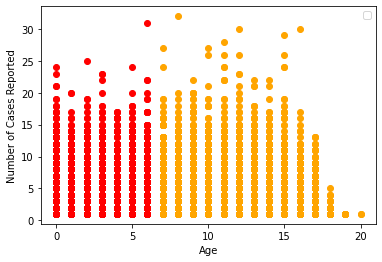

In [117]:
dedupe_exploded_df1 = dedupe_exploded_df[dedupe_exploded_df.cluster == 0]
dedupe_exploded_df2 = dedupe_exploded_df[dedupe_exploded_df.cluster == 1]



plt.scatter(dedupe_exploded_df1.AGE, dedupe_exploded_df1['NUM_CASES'], color='red')
plt.scatter(dedupe_exploded_df2.AGE, dedupe_exploded_df2['NUM_CASES'], color='orange')

plt.xlabel("Age")
plt.ylabel("Number of Cases Reported")
plt.locator_params(axis="both", integer=True)
plt.legend()

In [118]:
d1 = dedupe_exploded_df1.groupby('AGE')['cluster'].count()
d1

AGE
0    60341
1     7686
2     8292
3     8519
4     8874
5     9837
6    10603
Name: cluster, dtype: int64

In [119]:
d2 = dedupe_exploded_df2.groupby('AGE')['cluster'].count()
d2

AGE
7     10199
8     10042
9     10042
10     9821
11     9768
12     9754
13     9484
14     9116
15     8747
16     7769
17     6474
18      255
19        8
20        2
Name: cluster, dtype: int64

In [ ]:
# County level analytics -- drug use in counties